# Mise en pratique - Cross-validation et Grid-search

## Introduction

Dans cette mise en pratique, nous allons comparer plusieurs algorithmes de classification pour prédire le diagnostic du cancer du sein à partir du dataset Breast Cancer Wisconsin. Nous utiliserons la validation croisée (K-fold) et la recherche des meilleurs hyperparamètres avec Grid-Search. Nous allons évaluer les algorithmes suivants :

- K-Nearest Neighbors (KNN)
- Support Vector Machines (SVM)
- Stochastic Gradient Descent (SGDClassifier)
- Multi-layer Perceptron classifier (MLPClassifier)

Nous chercherons à déterminer quel algorithme offre la meilleure performance en cross-validation et optimiserons ensuite ses hyperparamètres pour obtenir les meilleurs résultats.

## Chargement du dataset

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer

# Chargement du dataset
data = load_breast_cancer(as_frame=True)
df = data.frame

# Aperçu des données
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


## Exploration préliminaire des données

### Structure des données

In [3]:
# Dimensions et types des colonnes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

### Statistiques descriptives

In [4]:
# Résumé statistique
df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


### Vérification des valeurs manquantes

In [5]:
# Vérification des NaN
df.isnull().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
dtype: int64

### Analyse de la distribution des variables

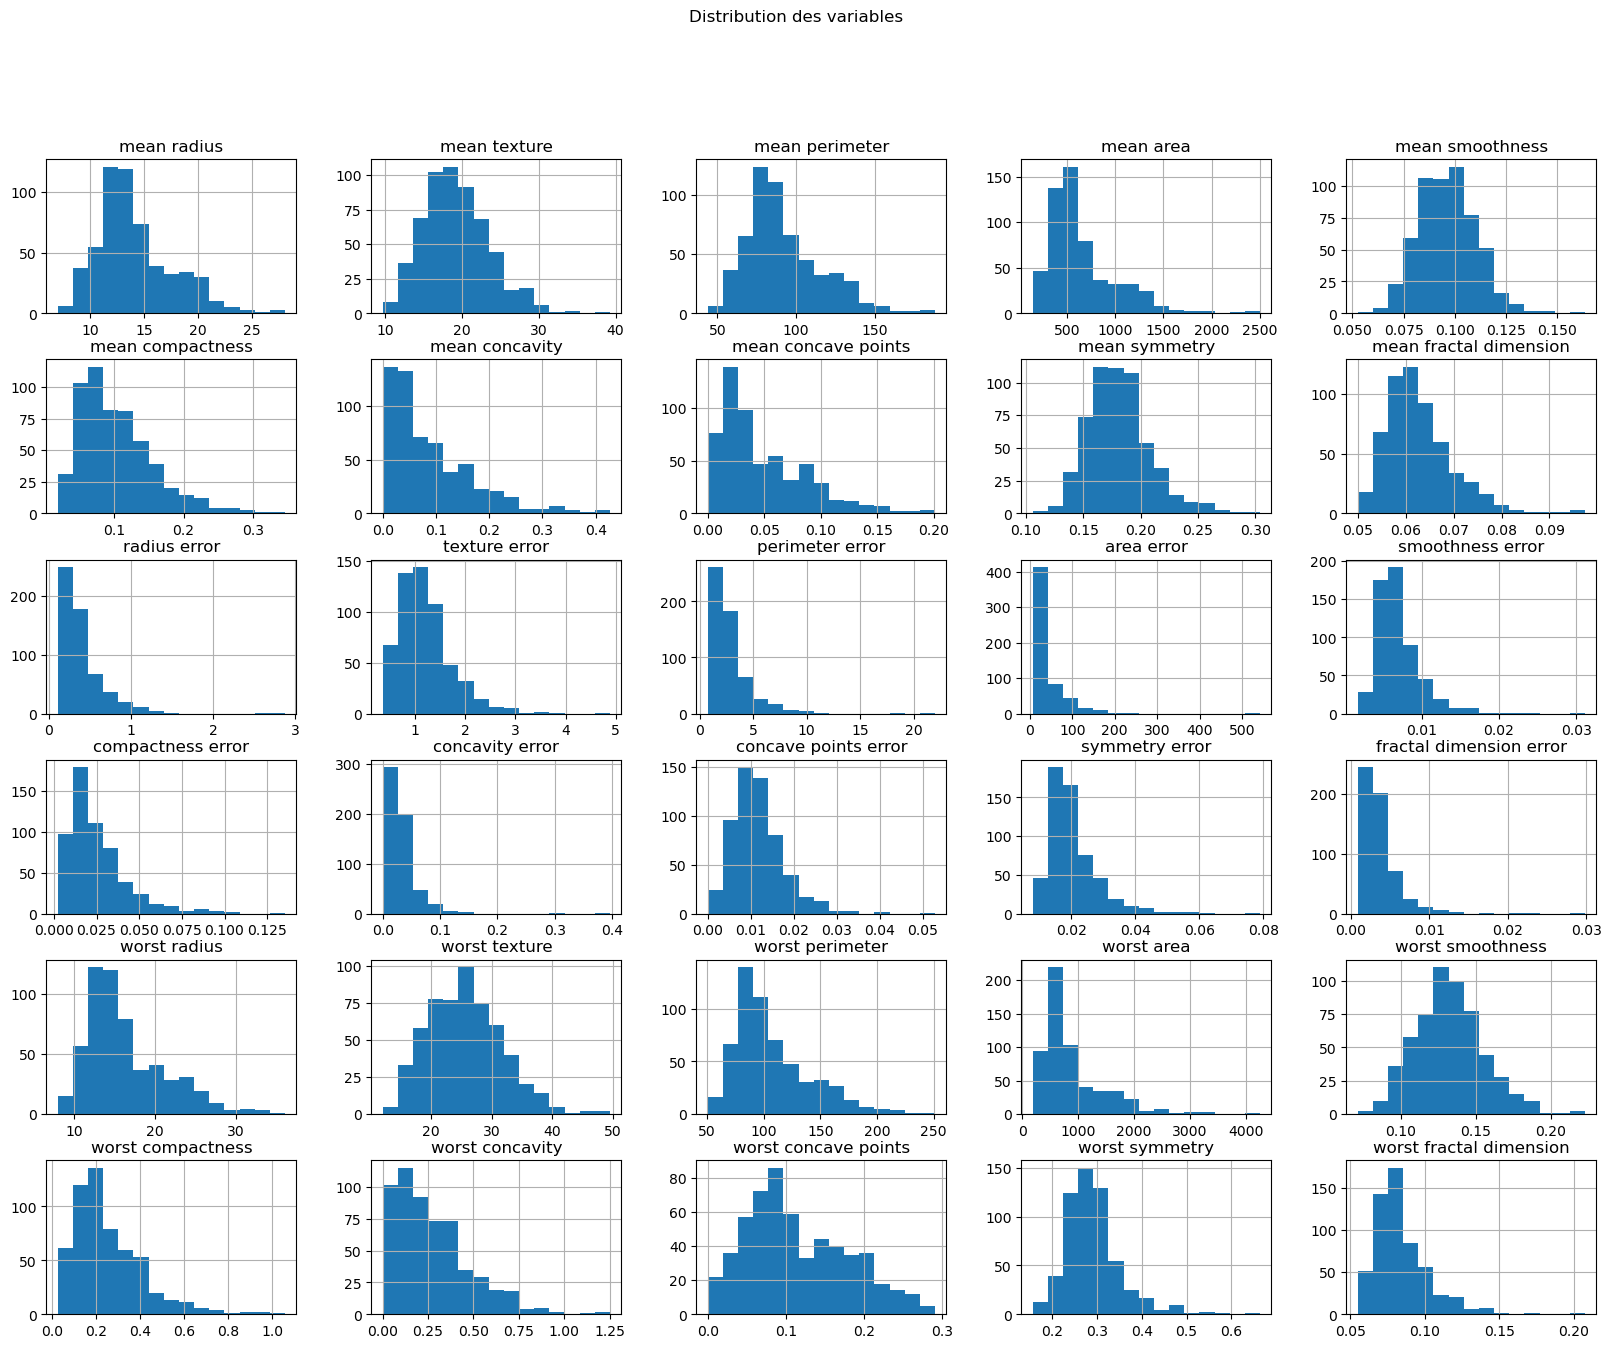

In [7]:
# Visualisation de la distribution des variables numériques
df.iloc[:, :-1].hist(bins=15, figsize=(20, 15))
plt.suptitle("Distribution des variables")
plt.show()

**Interprétation** :

- Les histogrammes montrent que certaines variables ont des échelles très différentes.
- Cela justifie l'application d'une standardisation pour équilibrer les données en vue de l'application des algorithmes.

## Préparation des données

### Séparation des caractéristiques (X) et de la cible (y)

In [8]:
# Séparer les caractéristiques (X) et la cible (y)
X = df.drop(columns=['target'])
y = df['target']

### Standardisation des données

In [9]:
# Standardisation des caractéristiques
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

## Modélisation et validation croisée

### Importation des algorithmes de classification

In [10]:
# Import des algorithmes
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score

# Initialisation des modèles
models = {
    'KNN': KNeighborsClassifier(),
    'SVM': SVC(),
    'SGD': SGDClassifier(),
    'MLP': MLPClassifier(max_iter=1000)
}

# Dictionnaire pour stocker les scores
cv_scores = {}

### Évaluation des performances avec validation croisée

- Comparer les modèles pour identifier celui qui performe le mieux avant optimisation.

In [11]:
# Validation croisée pour chaque modèle
for name, model in models.items():
    scores = cross_val_score(model, X_scaled, y, cv=5)
    cv_scores[name] = scores.mean()
    print(f"{name} : Score moyen = {scores.mean():.3f}, Écart-type = {scores.std():.3f}")

KNN : Score moyen = 0.965, Écart-type = 0.010
SVM : Score moyen = 0.974, Écart-type = 0.015
SGD : Score moyen = 0.968, Écart-type = 0.016
MLP : Score moyen = 0.974, Écart-type = 0.010


**Interprétation**:
- Les modèles SVM et MLP obtiennent les meilleurs scores (0.974), mais MLP est plus stable (écart-type 0.010 contre 0.015).
- KNN (0.965) est précis et stable, tandis que SGD (0.968) a une variabilité un peu plus élevée.
- **MLP est le meilleur choix global**.

## Optimisation avec Grid-Search

### Grilles d'hyperparamètres et optimisation

In [13]:
from sklearn.model_selection import GridSearchCV

# Définir les grilles pour chaque modèle
param_grids = {
    'KNN': {'n_neighbors': [3, 5, 7, 9]},
    'SVM': {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']},
    'SGD': {'alpha': [0.0001, 0.001, 0.01], 'loss': ['hinge', 'log_loss']},  # Corrigé ici
    'MLP': {'hidden_layer_sizes': [(50,), (100,), (50, 50)], 'alpha': [0.0001, 0.001]}
}

# Grid-Search pour chaque modèle
best_scores = {}
best_params = {}

for name, model in models.items():
    gs = GridSearchCV(estimator=model, param_grid=param_grids[name], cv=5, scoring='accuracy')
    gs.fit(X_scaled, y)
    best_scores[name] = gs.best_score_
    best_params[name] = gs.best_params_
    print(f"{name} : Meilleur score = {gs.best_score_:.3f}")
    print(f"{name} : Meilleurs paramètres = {gs.best_params_}")

KNN : Meilleur score = 0.968
KNN : Meilleurs paramètres = {'n_neighbors': 9}
SVM : Meilleur score = 0.977
SVM : Meilleurs paramètres = {'C': 10, 'kernel': 'rbf'}
SGD : Meilleur score = 0.981
SGD : Meilleurs paramètres = {'alpha': 0.01, 'loss': 'log_loss'}
MLP : Meilleur score = 0.975
MLP : Meilleurs paramètres = {'alpha': 0.0001, 'hidden_layer_sizes': (100,)}


**Interprétation et Choix**

- SGDClassifier est le modèle le plus précis avec 0.981. Sa fonction de coût log_loss et son paramètre alpha=0.01 montrent qu'il généralise bien tout en restant rapide et léger.

- SVM (score 0.977) est aussi performant, mais il peut être plus lent à entraîner, surtout sur des jeux de données volumineux.

- MLP (score 0.975) est fiable, mais plus gourmand en ressources. Son architecture simple reste efficace.

- KNN (score 0.968) est le moins performant, plus adapté aux problèmes simples.

**Choix final** : SGDClassifier est recommandé pour sa précision, sa vitesse, et sa simplicité.

## Résultats et comparaison

### Résumé des scores moyens et des paramètres optimaux

In [14]:
# Résumé des résultats
results = pd.DataFrame({
    'Modèle': best_scores.keys(),
    'Meilleur score': best_scores.values(),
    'Meilleurs paramètres': best_params.values()
})
results

,Modèle,Meilleur score,Meilleurs paramètres
0,KNN,0.968390,{'n_neighbors': 9}
1,SVM,0.977177,"{'C': 10, 'kernel': 'rbf'}"
2,SGD,0.980686,"{'alpha': 0.01, 'loss': 'log_loss'}"
3,MLP,0.975423,"{'alpha': 0.0001, 'hidden_layer_sizes': (100,)}"


**Conclusion**

- **SGDClassifier** est le plus performant (0.98) avec les paramètres ['alpha': 0.01, 'loss': 'log_loss'].